In [1]:
# Import standard libraries and relevant SKLearn modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
import pickle

In [2]:
# Read in pickled LR model and associated files

lr = pickle.load(open('../assets/lr.pkl', 'rb'))
X_train = pd.read_csv('../data/X_train.csv')
df_train = pd.read_csv('../data/train_cleaned_eng.csv')

In [3]:
# Visualizing coefficient weights was adadpted from code provided by Charlie
beta_0 = lr.intercept_

In [4]:
predictor_variables = X_train.columns
coef_weights = lr.coef_

In [5]:
beta_df = pd.DataFrame({'Predictor Variables': predictor_variables, 'Beta': coef_weights})
beta_df = beta_df.set_index('Predictor Variables')
beta_df['Absolute_Beta'] = abs(beta_df['Beta'])
beta_df = beta_df.sort_values('Absolute_Beta', ascending = False)

beta_df_10 = beta_df[:10]

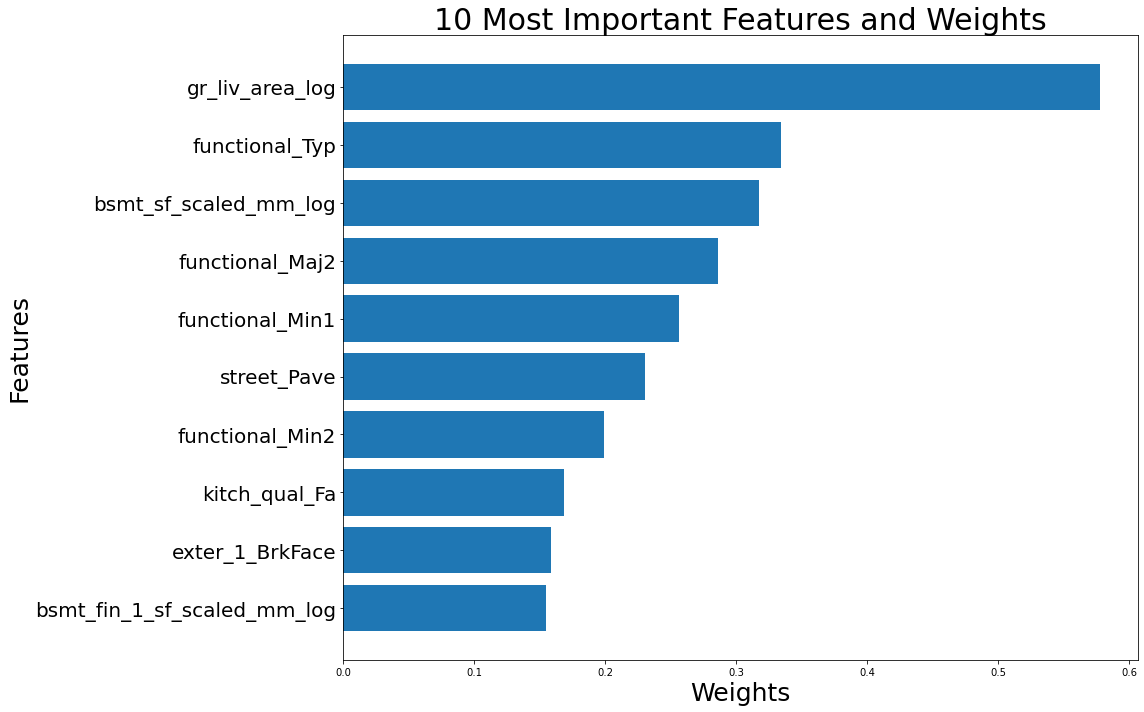

In [6]:
plt.figure(figsize=(16,10))
plt.barh(beta_df_10.index[::-1], beta_df_10['Absolute_Beta'][::-1])
plt.yticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Weights', fontsize=25)
plt.ylabel('Features', fontsize=25)
plt.title(f'10 Most Important Features and Weights', fontsize=30)
plt.tight_layout()

In the above chart, you can see the the most heavily weighted coefficient was the log of the above grade (ground) living area. Interestingly, the dummified functionality of the houses comprised four of the top 10 weighted features. Other features of note were the basement square footage and the quality of the kitchen.

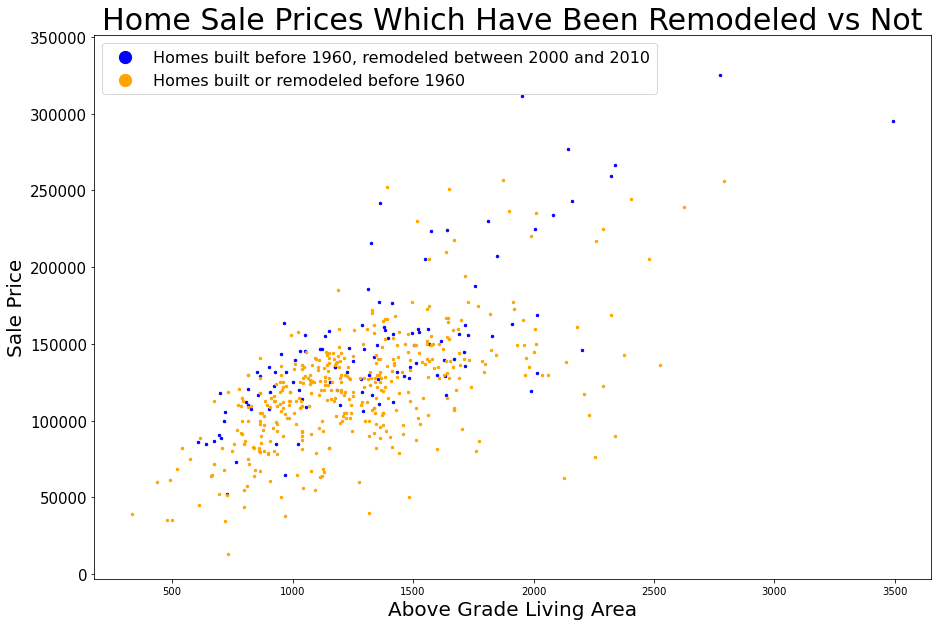

In [15]:
# https://www.geeksforgeeks.org/selecting-rows-in-pandas-dataframe-based-on-conditions/
# https://stackoverflow.com/questions/7125009/how-to-change-legend-size-with-matplotlib-pyplot

remodeled_2000_2010 = df_train.loc[df_train['yr_remodeled'] >= 2000]
remodeled_2000_2010_prebuilt = remodeled_2000_2010.loc[remodeled_2000_2010['yr_built'] < 1960]

needs_remodel = df_train.loc[df_train['yr_remodeled'] < 1960]

plt.figure(figsize = (15, 10))
plt.scatter(remodeled_2000_2010_prebuilt['gr_liv_area'], remodeled_2000_2010_prebuilt['sale_price'], alpha=1, s=6, color='blue')
plt.scatter(needs_remodel['gr_liv_area'], needs_remodel['sale_price'], alpha=1, s=6, color='orange')
plt.yticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Above Grade Living Area', fontsize=20)
plt.ylabel('Sale Price', fontsize=20)
plt.title(f'Home Sale Prices Which Have Been Remodeled vs Not', fontsize=30)
plt.legend(labels=['Homes built before 1960, remodeled between 2000 and 2010', 'Homes built or remodeled before 1960'], loc=2, prop={'size': 16}, markerscale=5);

In connection with my problem statement, I generated the above scatterplot to show the juxtaposition of houses based on the year they were remodeled. The blue markers represent houses that were built before 1960 and remodeled between 2000 and 2010. The orange markers represent houses that were built (or last remodeled) before 1960 and have not been remodeled since. It is quite clear (and sensible) that the houses which were remodeled between 2000 and 2010 have a higher average sale price than the houses which hadn't been remodeled. By sorting through these non-remodeled houses, I was able to select the 10 least expensive houses in each 500 SF bin to present to my target audience.

Considering my target audience is a group of home flippers, these houses provide a good selection of homes that could be purchased, remodeled, and flipped for a profit. In my table I also included all the relevant data about each home (in addition to the square footage) so that the prospective flippers could choose homes based on basement square footage, functionality, overall quality/condition, etc. in making their decision.

In [20]:
flip_opportunities = pd.DataFrame()  #columns = [columns]

flip_opportunities.head()

for i in range(500, 4000, 500):
    to_add = needs_remodel.loc[(needs_remodel['gr_liv_area'] > i) & (needs_remodel['gr_liv_area'] <= (i+500))].sort_values(by='sale_price')[:10]
    flip_opportunities = flip_opportunities.append(to_add)

flip_opportunities = flip_opportunities[['Id', 
                                         'gr_liv_area',
                                         'functional',
                                         'bsmt_sf',
                                         'street', 
                                         'exter_1',
                                         'bsmt_fin_1',
                                         'bsmt_fin_1_sf', 
                                         'kitch_qual',
                                         'lot_area',
                                         'neighborhood',
                                         'land_cont', 
                                         'cond_1',
                                         'bldg_type', 
                                         'style', 
                                         'overall_qual',
                                         'overall_cond',
                                         'yr_built', 
                                         'yr_remodeled', 
                                         'roof_style', 
                                         'exter_cond', 
                                         'foundation', 
                                         'bsmt_qual',
                                         'bsmt_cond', 
                                         'bsmt_expo',
                                         'cent_air', 
                                         'full_bath', 
                                         'half_bath', 
                                         'bedrooms_gr', 
                                         'kitchen',
                                         'tot_rooms_gr', 
                                         'fireplaces', 
                                         'garage_type',
                                         'garage_car_size', 
                                         'garage_cond', 
                                         'paved_drive', 
                                         'bsmt_full_bath',
                                         'bsmt_half_bath',
                                         'porch_sf',
                                        ]]

flip_opportunities.to_excel('../assets/flip_opportunities.xlsx')
flip_opportunities.head()

,Id,gr_liv_area,functional,bsmt_sf,street,exter_1,bsmt_fin_1,bsmt_fin_1_sf,kitch_qual,lot_area,...,kitchen,tot_rooms_gr,fireplaces,garage_type,garage_car_size,garage_cond,paved_drive,bsmt_full_bath,bsmt_half_bath,porch_sf
183,1554,733,Maj2,0.0,Pave,AsbShng,None,0.0,Fa,14584,...,1,4,0,Attchd,2,Fa,N,0.0,0.0,0
1308,727,720,Typ,720.0,Pave,Wd Sdng,Rec,495.0,TA,7879,...,1,4,0,None,0,NaN,N,0.0,0.0,638
1563,710,968,Typ,600.0,Pave,VinylSd,Unf,0.0,TA,5925,...,1,6,0,None,0,NaN,Y,0.0,0.0,0
103,728,797,Typ,245.0,Pave,AsbShng,Unf,0.0,TA,9392,...,1,5,0,None,0,NaN,N,0.0,0.0,130
1088,709,612,Typ,0.0,Pave,MetalSd,None,0.0,TA,5925,...,1,4,0,Detchd,1,Fa,N,0.0,0.0,25
